<a href="https://colab.research.google.com/github/Navaneeth1174/AIML-GROUP-PROJECT/blob/main/AIML_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORTING LIBRARIES**

In [83]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import norm, stats
import plotly.express as ex

### **DRIVE MOUNTING**

In [84]:
data = pd.read_csv("/content/drive/MyDrive/dup.csv")


## **IMPORTING DATA**

In [85]:
print(data.head())

                        Game  Year             Genre           Publisher  \
0                   Tekken 7  2017          Fighting  Namco Bandai Games   
1         Grand Theft Auto V  2014            Action      Rockstar Games   
2  Call of Duty: Black Ops 3  2015           Shooter          Activision   
3         Call of Duty: WWII  2017           Shooter          Activision   
4      Red Dead Redemption 2  2018  Action-Adventure      Rockstar Games   

  MULTI PLAYER ROLE PLAY  North America  Europe  Japan  Rest of World  Global  
0           NO       YES           0.30    0.23   0.00           0.05    0.58  
1           NO       YES           4.70    3.25   0.01           0.76    8.72  
2          YES       YES           4.63    2.04   0.02           0.68    7.37  
3          YES       YES           3.75    1.91   0.00           0.57    6.23  
4          YES       YES           3.76    1.47   0.00           0.54    5.77  


DATASET DIMENSIONS

In [87]:
print("Dataset Dimensions: {:,} columns and {:,} rows".format(data.shape[1], data.shape[0]))

data.head()

Dataset Dimensions: 11 columns and 207 rows


,Game,Year,Genre,Publisher,MULTI PLAYER,ROLE PLAY,North America,Europe,Japan,Rest of World,Global
0,Tekken 7,2017,Fighting,Namco Bandai Games,NO,YES,0.30,0.23,0.00,0.05,0.58
1,Grand Theft Auto V,2014,Action,Rockstar Games,NO,YES,4.70,3.25,0.01,0.76,8.72
2,Call of Duty: Black Ops 3,2015,Shooter,Activision,YES,YES,4.63,2.04,0.02,0.68,7.37
3,Call of Duty: WWII,2017,Shooter,Activision,YES,YES,3.75,1.91,0.00,0.57,6.23
4,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,YES,YES,3.76,1.47,0.00,0.54,5.77


## **DESCRIBING THE DATA**(STATISTICAL INFORMATION OF DATA)

In [88]:
data.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,2015.425121,0.734831,0.378213,0.002319,0.111498,1.226425
std,1.362802,0.845703,0.491969,0.006857,0.126100,1.388059
min,2013.000000,0.010000,0.000000,0.000000,0.010000,0.190000
25%,2014.000000,0.235000,0.090000,0.000000,0.030000,0.365000
50%,2015.000000,0.410000,0.190000,0.000000,0.060000,0.700000
75%,2017.000000,0.870000,0.430000,0.000000,0.135000,1.550000
max,2018.000000,4.700000,3.250000,0.040000,0.760000,8.720000


## **CHECKING FOR NULL VALUES**

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           207 non-null    object 
 1   Year           207 non-null    int64  
 2   Genre          207 non-null    object 
 3   Publisher      207 non-null    object 
 4   MULTI PLAYER   207 non-null    object 
 5   ROLE PLAY      207 non-null    object 
 6   North America  207 non-null    float64
 7   Europe         207 non-null    float64
 8   Japan          207 non-null    float64
 9   Rest of World  207 non-null    float64
 10  Global         207 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 17.9+ KB


NO NULL VALUES FOUND

## **BINARY CONVERSION**

In [90]:
varlist =  ['ROLE PLAY']
def binary_map(x):
    return x.map({'YES': 1, 'NO': 0})
data[varlist] = data[varlist].apply(binary_map)

varlist1 =  ['MULTI PLAYER']
def binary_map(x):
    return x.map({'YES': 1, 'NO': 0})
data[varlist1] = data[varlist1].apply(binary_map)
data


,Game,Year,Genre,Publisher,MULTI PLAYER,ROLE PLAY,North America,Europe,Japan,Rest of World,Global
0,Tekken 7,2017,Fighting,Namco Bandai Games,0,1,0.30,0.23,0.00,0.05,0.58
1,Grand Theft Auto V,2014,Action,Rockstar Games,0,1,4.70,3.25,0.01,0.76,8.72
2,Call of Duty: Black Ops 3,2015,Shooter,Activision,1,1,4.63,2.04,0.02,0.68,7.37
3,Call of Duty: WWII,2017,Shooter,Activision,1,1,3.75,1.91,0.00,0.57,6.23
4,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,1,1,3.76,1.47,0.00,0.54,5.77
...,...,...,...,...,...,...,...,...,...,...,...
202,theHunter: Call of the Wild,2017,Shooter,Astragon,1,1,0.18,0.00,0.00,0.02,0.21
203,Sleeping Dogs,2014,Action-Adventure,Square Enix,1,1,0.10,0.09,0.00,0.02,0.20
204,Project CARS 2,2017,Racing,Namco Bandai Games,1,0,0.01,0.18,0.00,0.01,0.20
205,Batman: Return to Arkham,2016,Action,Warner Bros. Interactive Entertainment,1,1,0.12,0.06,0.00,0.02,0.20


## **Top 10 best-selling game categories:**

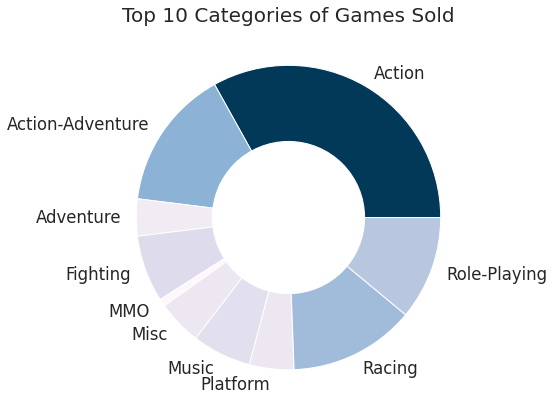

In [91]:
import matplotlib as mpl
game = data.groupby("Genre")["Global"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

## We can see that the "Action" genre is the most popular type of video game by far.

## **Top 10 Video Game Publishers by Global Sales Per Year**

In [92]:
sales_list = [ 'North America', 'Europe', 'Japan','Rest of World','Global',]
top_10_pubs = data.groupby(['Publisher'
                              ])[sales_list].sum().sort_values(by='Global', 
                                                               ascending=False).reset_index()['Publisher'].unique()[:10]

vid_year_pub = data.groupby(['Year', 'Publisher'])[sales_list].sum().sort_values(by='Global',
                                                                                    ascending=False).reset_index()
vid_year_pub = vid_year_pub[vid_year_pub['Publisher'].isin(top_10_pubs)]

ex.area(vid_year_pub, x='Year', y="Global", color="Publisher", 
        title='Top 10 Video Game Publishers by Global Sales Per Year', 
        labels={"Global": "Sales (In Millions)", "Publisher": 'Publishers'})

## We can see that 'EA SPORTS' & '2K SPORTS' has continued to be the leading industries throughout the years.

# **Annotated Co-relation Matrices of Sales**

Text(0.5, 1.0, 'Annotated Correlation Matrix of Sales Columns')

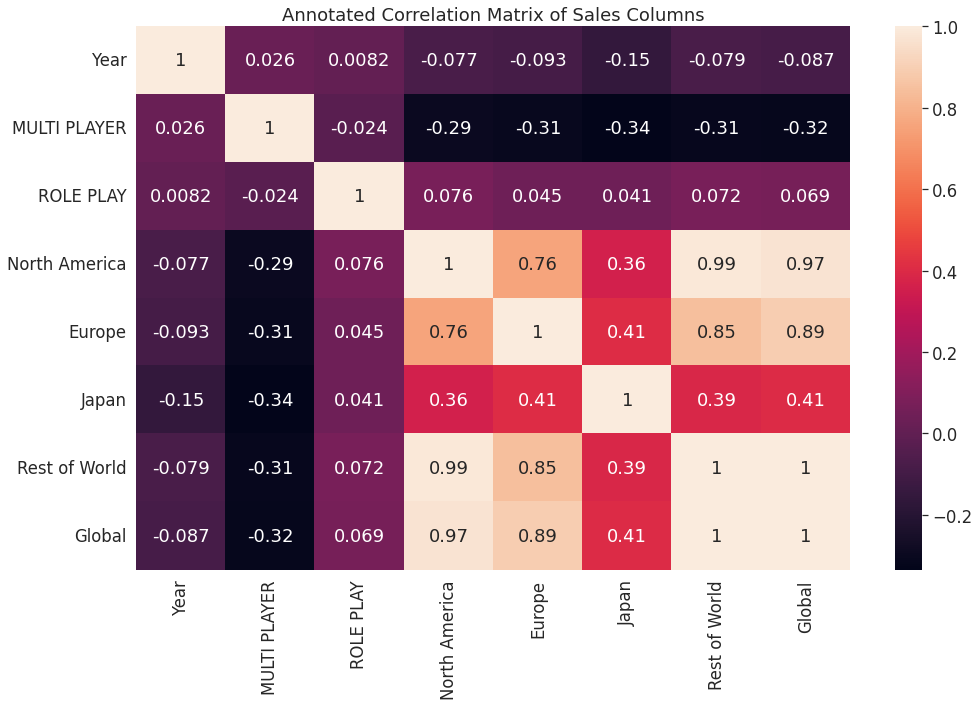

In [93]:
plt.rcParams['figure.figsize'] = (16, 10)

sb.set(font_scale = 1.5)
sb.set_style(style='white')

sb.heatmap(data.corr(), annot=True).set_title('Annotated Correlation Matrix of Sales Columns')

# The matrix above makes it clear that Year column have no significant relationship with any of the sales columns and thus they can be safely dropped from the dataset.

# **Numerical Column Histograms**

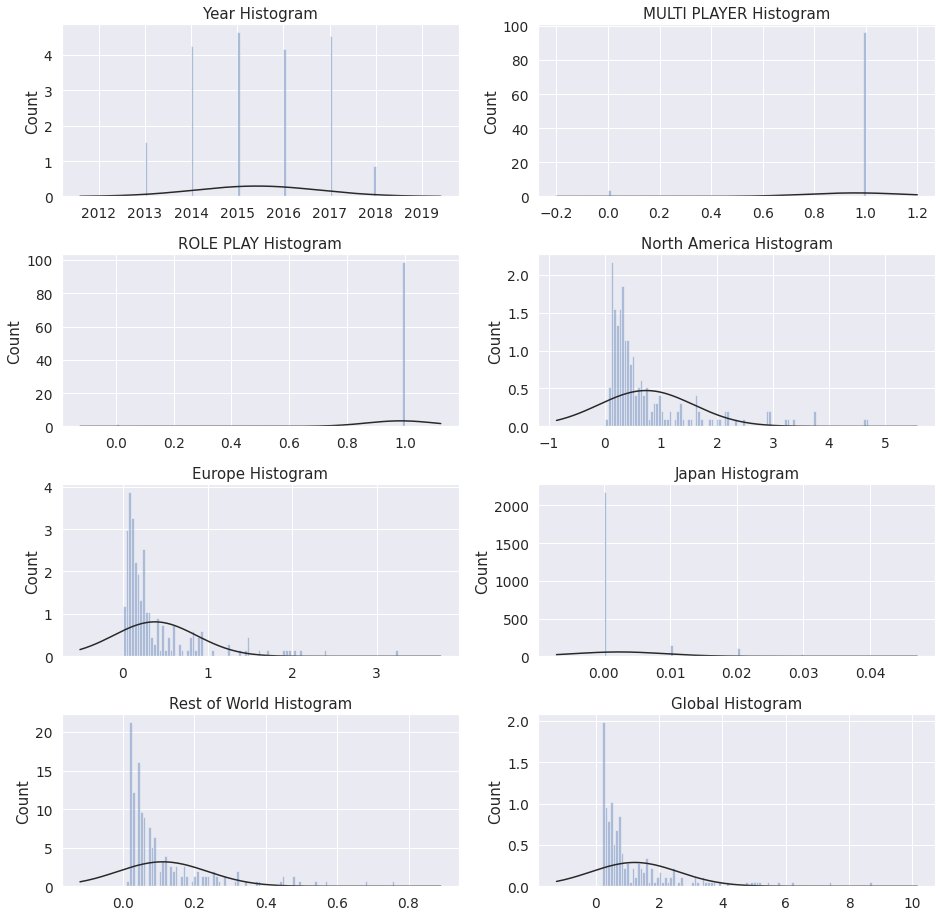

In [94]:

fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.5)
fig.set_size_inches(13.5, 13)
sb.set(font_scale = 1.25)

warnings.filterwarnings('ignore')

i = 1
for var in data.columns:
    try:
        fig.add_subplot(4, 2, i)
        sb.distplot(pd.Series(data[var], name=''), bins=100,
                    fit=norm, kde=False).set_title(var + " Histogram")
        plt.ylabel('Count')

        i += 1
    except ValueError:
      pass

fig.tight_layout()
warnings.filterwarnings('default')


### **CORRELATION OF MATRICS OF ROLE PLAYING AND MULTI PLAYER**

Text(0.5, 1.0, 'Annotated Correlation Matrix of RP AND MULTI PLAYER')

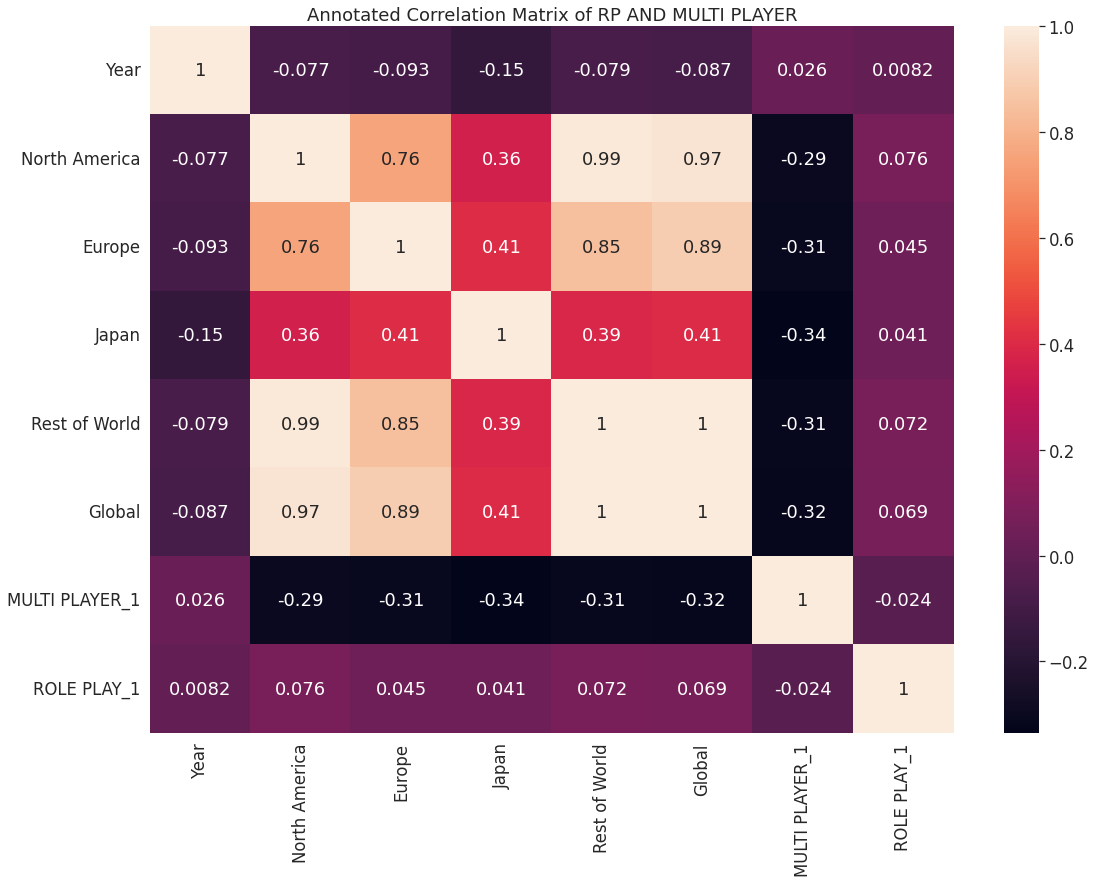

In [95]:
df = pd.get_dummies(data, prefix=['MULTI PLAYER','ROLE PLAY'], columns=['MULTI PLAYER','ROLE PLAY'], drop_first=True)

plt.rcParams['figure.figsize'] = (18, 13)

sb.set(font_scale = 1.5)
sb.set_style(style='dark')

sb.heatmap(df.corr(), annot=True).set_title('Annotated Correlation Matrix of RP AND MULTI PLAYER')

From the matrix it is clear that Multi player column has not enough significant relationship with any of the sales columns and thus they can be safely dropped from the dataset.

**CATEGORIAL CONVERSION**

In [96]:
status = pd.get_dummies(data['Game'], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['Game'], axis = 1, inplace = True)
data

,Year,Genre,Publisher,MULTI PLAYER,ROLE PLAY,North America,Europe,Japan,Rest of World,Global,...,WWE 2K16,WWE 2K17,WWE 2K18,Watch Dogs,Watch Dogs 2,Wolfenstein II: The New Colossus,Wolfenstein: The New Order,Zoo Tycoon (2013),Zumba Fitness: World Party,theHunter: Call of the Wild
0,2017,Fighting,Namco Bandai Games,0,1,0.30,0.23,0.00,0.05,0.58,...,0,0,0,0,0,0,0,0,0,0
1,2014,Action,Rockstar Games,0,1,4.70,3.25,0.01,0.76,8.72,...,0,0,0,0,0,0,0,0,0,0
2,2015,Shooter,Activision,1,1,4.63,2.04,0.02,0.68,7.37,...,0,0,0,0,0,0,0,0,0,0
3,2017,Shooter,Activision,1,1,3.75,1.91,0.00,0.57,6.23,...,0,0,0,0,0,0,0,0,0,0
4,2018,Action-Adventure,Rockstar Games,1,1,3.76,1.47,0.00,0.54,5.77,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2017,Shooter,Astragon,1,1,0.18,0.00,0.00,0.02,0.21,...,0,0,0,0,0,0,0,0,0,1
203,2014,Action-Adventure,Square Enix,1,1,0.10,0.09,0.00,0.02,0.20,...,0,0,0,0,0,0,0,0,0,0
204,2017,Racing,Namco Bandai Games,1,0,0.01,0.18,0.00,0.01,0.20,...,0,0,0,0,0,0,0,0,0,0
205,2016,Action,Warner Bros. Interactive Entertainment,1,1,0.12,0.06,0.00,0.02,0.20,...,0,0,0,0,0,0,0,0,0,0


In [97]:
status = pd.get_dummies(data['Genre'], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['Genre'], axis = 1, inplace = True)
data

,Year,Publisher,MULTI PLAYER,ROLE PLAY,North America,Europe,Japan,Rest of World,Global,ARK: Survival Evolved,...,MMO,Misc,Music,Platform,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,2017,Namco Bandai Games,0,1,0.30,0.23,0.00,0.05,0.58,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,Rockstar Games,0,1,4.70,3.25,0.01,0.76,8.72,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,Activision,1,1,4.63,2.04,0.02,0.68,7.37,0,...,0,0,0,0,0,0,1,0,0,0
3,2017,Activision,1,1,3.75,1.91,0.00,0.57,6.23,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,Rockstar Games,1,1,3.76,1.47,0.00,0.54,5.77,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2017,Astragon,1,1,0.18,0.00,0.00,0.02,0.21,0,...,0,0,0,0,0,0,1,0,0,0
203,2014,Square Enix,1,1,0.10,0.09,0.00,0.02,0.20,0,...,0,0,0,0,0,0,0,0,0,0
204,2017,Namco Bandai Games,1,0,0.01,0.18,0.00,0.01,0.20,0,...,0,0,0,0,1,0,0,0,0,0
205,2016,Warner Bros. Interactive Entertainment,1,1,0.12,0.06,0.00,0.02,0.20,0,...,0,0,0,0,0,0,0,0,0,0


Droping Unneeded Columns

In [98]:
data = data.drop(labels='Publisher', axis=1)

In [99]:
data = data.drop(labels='Year', axis=1)

In [100]:
data

,MULTI PLAYER,ROLE PLAY,North America,Europe,Japan,Rest of World,Global,ARK: Survival Evolved,Alien: Isolation,Assassin's Creed IV: Black Flag,...,MMO,Misc,Music,Platform,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,0,1,0.30,0.23,0.00,0.05,0.58,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,4.70,3.25,0.01,0.76,8.72,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4.63,2.04,0.02,0.68,7.37,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,3.75,1.91,0.00,0.57,6.23,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,3.76,1.47,0.00,0.54,5.77,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1,1,0.18,0.00,0.00,0.02,0.21,0,0,0,...,0,0,0,0,0,0,1,0,0,0
203,1,1,0.10,0.09,0.00,0.02,0.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,1,0,0.01,0.18,0.00,0.01,0.20,0,0,0,...,0,0,0,0,1,0,0,0,0,0
205,1,1,0.12,0.06,0.00,0.02,0.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **DETECTION OF OUTLINERS**

In [101]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 1
    mean = np.mean(data)
    std = np.std(data)
    #print(mean, std)
    for i in data:
        #print(i)
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [102]:
sample_outliers_NA = detect_outliers_zscore(data['North America']) 
print("Outliers in North America column from Z-scores method: ", sample_outliers_NA)

Outliers in North America column from Z-scores method:  [4.7, 4.63, 3.75, 3.76, 3.23, 3.25, 3.37, 2.94, 2.94, 2.91, 2.49, 1.64, 2.88, 2.34, 2.06, 2.17, 2.17, 1.88, 1.92, 1.63, 1.62, 2.13, 2.14, 2.01, 1.66, 1.7, 1.67, 1.63]


**MISSING VALUES TREATMENT**

NEW SELECTION

In [103]:
print(data.isnull().sum())

MULTI PLAYER     0
ROLE PLAY        0
North America    0
Europe           0
Japan            0
                ..
Role-Playing     0
Shooter          0
Simulation       0
Sports           0
Strategy         0
Length: 225, dtype: int64


**DATA NORMALIZATION**

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)
data_norm

array([[0.        , 1.        , 0.06183369, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.98507463, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.02345416, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.02558635, ..., 0.        , 0.        ,
        0.        ]])

**DATA SPLIT**

In [105]:
from sklearn.model_selection import train_test_split
dataframe = data.values
X, y = dataframe[:, :-1], dataframe[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
x_train

array([[1.  , 1.  , 0.12, ..., 0.  , 0.  , 0.  ],
       [1.  , 1.  , 0.97, ..., 0.  , 0.  , 0.  ],
       [1.  , 1.  , 0.41, ..., 0.  , 0.  , 0.  ],
       ...,
       [1.  , 1.  , 2.34, ..., 0.  , 0.  , 0.  ],
       [1.  , 1.  , 0.31, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 2.94, ..., 1.  , 0.  , 0.  ]])

In [106]:
seed = 74
x, x_test, y, y_test = train_test_split(data[data.columns.drop('Global')],
                                                    data['Global'],
                                                    train_size=0.70,
                                                    random_state=seed)

**X-STRUCTURE**

In [108]:
print("X_train Dimensions: {:,} columns and {:,} rows".format(x_train.shape[1], x_train.shape[0]))

x

X_train Dimensions: 224 columns and 165 rows


,MULTI PLAYER,ROLE PLAY,North America,Europe,Japan,Rest of World,ARK: Survival Evolved,Alien: Isolation,Assassin's Creed IV: Black Flag,Assassin's Creed Origins,...,MMO,Misc,Music,Platform,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
141,1,1,0.24,0.17,0.0,0.04,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,1,1,0.50,0.20,0.0,0.07,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
43,1,1,1.34,0.23,0.0,0.18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,1,1,0.35,0.25,0.0,0.06,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
185,1,1,0.13,0.09,0.0,0.02,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1,1,0.88,0.37,0.0,0.13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
201,1,1,0.18,0.00,0.0,0.02,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
137,1,1,0.30,0.12,0.0,0.04,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,1,1,0.46,0.24,0.0,0.07,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


DISCRIBING 'X' (Statistical Information )

In [109]:
print("Describe Data: X")

x.describe()

Describe Data: X


,MULTI PLAYER,ROLE PLAY,North America,Europe,Japan,Rest of World,ARK: Survival Evolved,Alien: Isolation,Assassin's Creed IV: Black Flag,Assassin's Creed Origins,...,MMO,Misc,Music,Platform,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.0,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.972222,0.979167,0.770556,0.395625,0.002153,0.116875,0.006944,0.006944,0.006944,0.0,...,0.006944,0.027778,0.034722,0.020833,0.076389,0.076389,0.215278,0.027778,0.180556,0.006944
std,0.164909,0.143325,0.862148,0.488567,0.006707,0.127183,0.083333,0.083333,0.083333,0.0,...,0.083333,0.164909,0.183714,0.143325,0.266546,0.266546,0.412450,0.164909,0.385992,0.083333
min,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.250000,0.097500,0.000000,0.040000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.420000,0.200000,0.000000,0.065000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.932500,0.480000,0.000000,0.150000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,4.630000,2.400000,0.040000,0.680000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Y - STRUCTURE**

In [110]:
print("Y_train Dimensions: 1 column and {:,} rows".format(y_train.shape[0]))
y

Y_train Dimensions: 1 column and 165 rows


141    0.44
90     0.78
43     1.74
109    0.66
185    0.24
       ... 
62     1.37
201    0.21
137    0.46
91     0.77
158    0.34
Name: Global, Length: 144, dtype: float64

DISCRIBING 'X' (Statistical Information )

In [111]:
print("Describe Data: Y")

y.describe()


Describe Data: Y


count    144.000000
mean       1.284722
std        1.391306
min        0.200000
25%        0.397500
50%        0.720000
75%        1.617500
max        7.370000
Name: Global, dtype: float64

**Conducting Linear Regression Modeling**

In [112]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)